In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

In [2]:
foodproduction = pd.read_csv("C:/Users/Toluhenok/Downloads/Africa Food Production (2004 - 2013).csv")

In [3]:
foodproduction.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [4]:
foodproduction.shape

(23110, 4)

In [5]:
#add kiloton to every value
#foodproduction['Value'] = foodproduction['Value'].astype(str) + ' Kt'

In [6]:
#foodproduction['Value'] = foodproduction['Value'].astype(str) + ' Kt'

In [7]:
foodproduction.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [8]:
#group by countries, items and year
fp_grouped = foodproduction.groupby(['Country', 'Item', 'Year'])
#sum of values for each year
fp_summed = fp_grouped.sum()
fp_summed = fp_summed.reset_index()
fp_summed.head()

,Country,Item,Year,Value
0,Algeria,Apples and products,2004,165
1,Algeria,Apples and products,2005,200
2,Algeria,Apples and products,2006,283
3,Algeria,Apples and products,2007,190
4,Algeria,Apples and products,2008,261


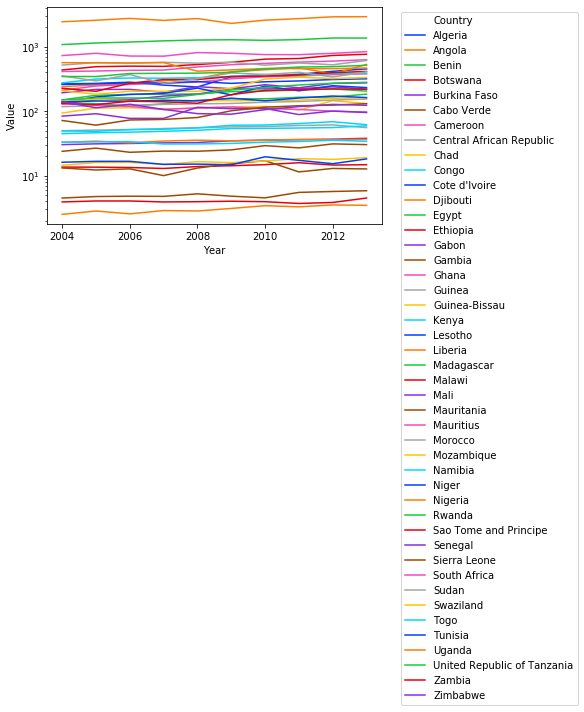

In [9]:
foodprod1 = sns.lineplot(x = fp_summed["Year"], y = fp_summed['Value'], hue = fp_summed['Country'],
                       palette = 'bright', ci = None, data = fp_summed)
foodprod1.set_yscale('log')
foodprod1.legend(loc='upper right', bbox_to_anchor=(1.6, 1))


In [10]:
#import food supply dataset
foodsupply = pd.read_csv("C:/Users/Toluhenok/Downloads/Africa Food Supply (2004 - 2013).csv")

In [11]:
foodsupply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [12]:
#group by countries
fs_grouped = foodsupply.groupby(['Country', 'Year'])
fs_summed = fs_grouped.sum()
fs_summed = fs_summed.reset_index()
fs_summed.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [13]:
fs_grouped["Year"].head()

0      2004
1      2005
2      2006
3      2007
4      2008
       ... 
445    2009
446    2010
447    2011
448    2012
449    2013
Name: Year, Length: 450, dtype: int64

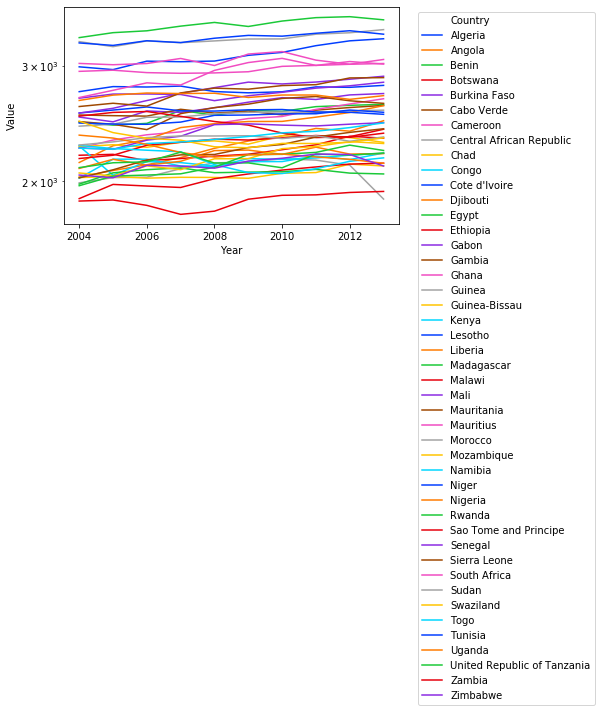

In [14]:
foodsupply = sns.lineplot(x = fs_summed["Year"], y = fs_summed['Value'], hue = fs_summed['Country'],
                       palette = 'bright', ci = None, data = fs_summed)
foodsupply.set_yscale('log')
foodsupply.legend(loc='upper right', bbox_to_anchor=(1.6, 1))


In [15]:
#sort the data in order.
sort_fp_val = foodproduction['Value'].sort_values(ascending=False)
sort_fp_val

15448    54000
15449    53000
15447    52403
15442    45721
15444    44582
         ...  
12555        0
12560        0
12561        0
12562        0
23109        0
Name: Value, Length: 23110, dtype: int64

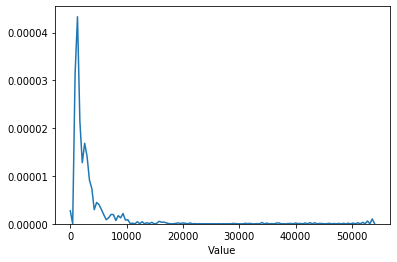

In [16]:
#visualizing the sorted data from a descending order in the  food production dataset
ax = sns.distplot(sort_fp_val, hist=False)

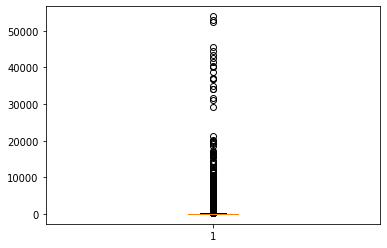

In [17]:
#outliers found the total number of values of food production
plt.boxplot(foodproduction['Value'])
plt.show()

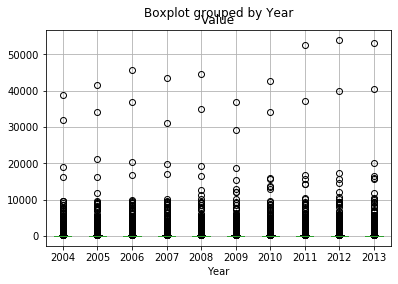

In [18]:
#range of values by each year for food production between 2004 and 2013
foodproduction.boxplot(column='Value', by='Year', meanline=True)

In [19]:
#Food Consumption in 45 African countries between 2004 and 2013
foodsupply.boxplot(column ='Value', by='Year', notch=True)

TypeError: boxplot() got an unexpected keyword argument 'column'

In [20]:
fs2012 = foodsupply.iloc[-2]

AttributeError: 'AxesSubplot' object has no attribute 'iloc'

In [ ]:
fs2012

In [ ]:
fs_2012 = foodsupply[foodsupply['Year'] == 2012]
fs_2012.head()

In [ ]:
q1, q3= np.quantile(foodsupply['Value'], [.25, .75])

In [21]:
mean = np.mean(foodsupply['Value'])

TypeError: 'AxesSubplot' object is not subscriptable

In [ ]:
q1, q3

In [ ]:
iqr = q3 - q1
iqr

In [ ]:
upper_fence = q3 + (1.5 * q3)
lower_fence = q1 - (1.5 * q1)


In [ ]:
upper_fence, lower_fence

In [ ]:
upper_outlier = foodsupply[foodsupply.Value>upper_fence]
lower_outlier = foodsupply[foodsupply.Value>lower_fence]
outlier = pd.concat([upper_outlier, lower_outlier])
outlier

In [ ]:
outlier1 = foodsupply[~((foodsupply ["Value"] < lower_fence) |(foodsupply["Value"] > upper_fence))]

In [ ]:
fp_grouped = pd.DataFrame(foodproduction.groupby(['Country', 'Year'], as_index=False).sum())

In [ ]:
fp_grouped

In [ ]:
#mean amount of rice produced
fp_summed.groupby(['Year']).mean()

In [ ]:
foodproduction = foodproduction[["Item","Year","Value"]] # choose these columns
foodproduction[foodproduction['Item'] == "Rice"].groupby(["Year"]).mean()

In [31]:
df = pd.read_csv("C:/Users/Toluhenok/Downloads/API_SP.POP.TOTL_DS2_en_csv_v2_1308146/API_SP.POP.TOTL_DS2_en_csv_v2_1308146.csv",  skiprows=4)
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,23807588.0,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52004172.0,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14023193.0,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,NaN


In [32]:
popdf = df[['Country Name', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']]
popdf

,Country Name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Aruba,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0
1,Afghanistan,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0
2,Angola,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0
3,Albania,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0
4,Andorra,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0
...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0
260,"Yemen, Rep.",19540098.0,20107409.0,20687646.0,21282515.0,21892146.0,22516460.0,23154855.0,23807588.0,24473178.0,25147109.0
261,South Africa,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52004172.0,52834005.0,53689236.0
262,Zambia,11550642.0,11856247.0,12173514.0,12502958.0,12848530.0,13215139.0,13605984.0,14023193.0,14465121.0,14926504.0


In [33]:
popdf=pd.melt(popdf, id_vars=['Country Name'], var_name='Year')
popdf

,Country Name,Year,value
0,Aruba,2004,98737.0
1,Afghanistan,2004,24726684.0
2,Angola,2004,18758145.0
3,Albania,2004,3026939.0
4,Andorra,2004,76244.0
...,...,...,...
2635,Kosovo,2013,1818117.0
2636,"Yemen, Rep.",2013,25147109.0
2637,South Africa,2013,53689236.0
2638,Zambia,2013,14926504.0


In [34]:
popdf = popdf.groupby(['Country Name', 'Year']).mean()
popdf

value
Country Name Year            
Afghanistan  2004  24726684.0
             2005  25654277.0
             2006  26433049.0
             2007  27100536.0
             2008  27722276.0
...                       ...
Zimbabwe     2009  12526968.0
             2010  12697723.0
             2011  12894316.0
             2012  13115131.0
             2013  13350356.0

[2640 rows x 1 columns]

In [35]:
popdf.rename(columns={'value':'Avg population'}, inplace=True)
popdf

Avg population
Country Name Year                
Afghanistan  2004      24726684.0
             2005      25654277.0
             2006      26433049.0
             2007      27100536.0
             2008      27722276.0
...                           ...
Zimbabwe     2009      12526968.0
             2010      12697723.0
             2011      12894316.0
             2012      13115131.0
             2013      13350356.0

[2640 rows x 1 columns]